In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as opt

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import utils

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [3]:

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
    ]   
)

mnist_train = datasets.MNIST(
    root="./data/", 
    train=True, 
    download=True, 
    transform=transform
)

mnist_test = datasets.MNIST(
    root="./data/", 
    train=False, 
    download=True, 
    transform=transform
)

batch_size = 100

data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

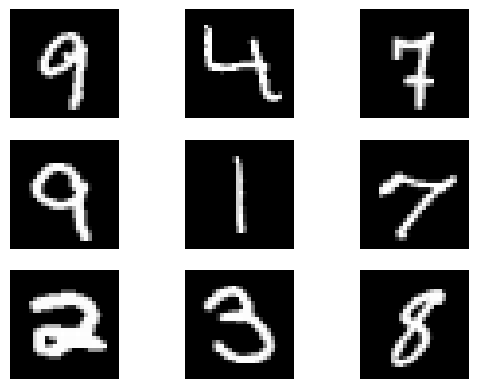

In [4]:
import random
random.seed(777)

figure = plt.figure()

r, c = 3, 3

for n in range(1, r * c + 1):
    figure.add_subplot(3, 3, n)
    plt.imshow(mnist_train[random.randrange(len(mnist_train))][0].squeeze(), cmap="gray")
    plt.axis("off")

plt.show()

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(784, 1024, bias=True),
            nn.ReLU(),
            nn.Linear(1024, 512, bias=True),
            nn.ReLU(),
            nn.Linear(512, 256, bias=True),
            nn.ReLU(),
            nn.Linear(256, 1, bias=True),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layers(x.reshape(x.shape[0], -1))
        return x

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(784, 256, bias=True),
            nn.ReLU(),
            nn.Linear(256, 512, bias=True),
            nn.ReLU(),
            nn.Linear(512, 1024, bias=True),
            nn.ReLU(),
            nn.Linear(1024, 784, bias=True),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.layers(x.reshape(x.shape[0], -1))        

In [6]:
d = Discriminator()
g = Generator()

d.cuda()
g.cuda()

lr = 2e-4

d_optimizer = opt.Adam(d.parameters(), lr=lr)
g_optimizer = opt.Adam(g.parameters(), lr=lr)

loss_function = nn.BCELoss()

epochs = 100

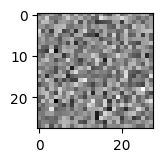

In [9]:
rand_noise = torch.randn(1, 784).cuda()
rand_img = g(rand_noise)

utils.imshow(rand_img)

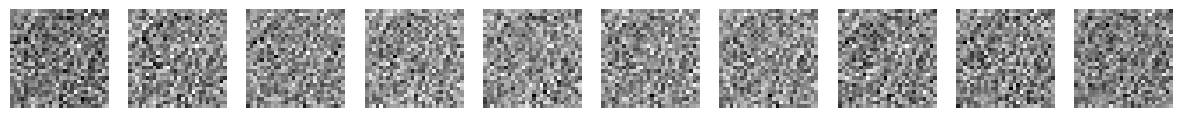

In [10]:
rand_noise_grid = torch.randn(10, 784).cuda()
rand_imgs = g(rand_noise_grid)

utils.grid_imshow(rand_imgs)

1 epoch execution


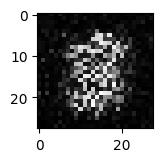


        loss status
        d_loss: 0.038341276347637177
        g_loss: 5.879159927368164
        
        
1 epoch termination

2 epoch execution


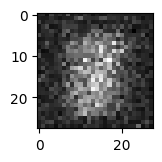


        loss status
        d_loss: 0.16128109395503998
        g_loss: 2.8199009895324707
        
        
2 epoch termination

3 epoch execution


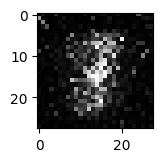


        loss status
        d_loss: 0.46839582920074463
        g_loss: 4.072352886199951
        
        
3 epoch termination

4 epoch execution


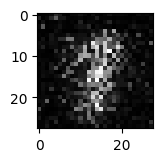


        loss status
        d_loss: 0.7585198283195496
        g_loss: 2.203906297683716
        
        
4 epoch termination

5 epoch execution


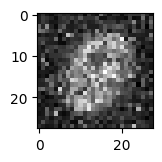


        loss status
        d_loss: 0.36611729860305786
        g_loss: 2.161081552505493
        
        
5 epoch termination

6 epoch execution


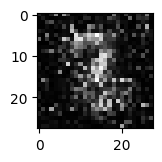


        loss status
        d_loss: 0.5377155542373657
        g_loss: 2.498398542404175
        
        
6 epoch termination

7 epoch execution


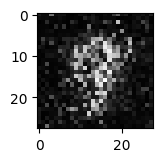


        loss status
        d_loss: 0.21606364846229553
        g_loss: 2.9422221183776855
        
        
7 epoch termination

8 epoch execution


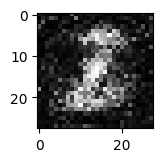


        loss status
        d_loss: 0.4068167209625244
        g_loss: 2.9130265712738037
        
        
8 epoch termination

9 epoch execution


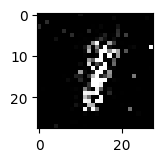


        loss status
        d_loss: 0.3352466821670532
        g_loss: 3.6192407608032227
        
        
9 epoch termination

10 epoch execution


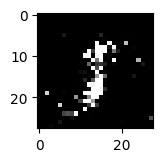


        loss status
        d_loss: 0.06486359238624573
        g_loss: 5.041606426239014
        
        
10 epoch termination

11 epoch execution


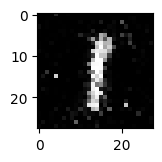


        loss status
        d_loss: 0.18192388117313385
        g_loss: 4.457039833068848
        
        
11 epoch termination

12 epoch execution


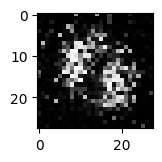


        loss status
        d_loss: 0.16998708248138428
        g_loss: 5.464334487915039
        
        
12 epoch termination

13 epoch execution


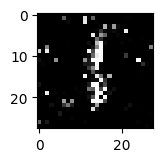


        loss status
        d_loss: 0.2269698977470398
        g_loss: 5.302163124084473
        
        
13 epoch termination

14 epoch execution


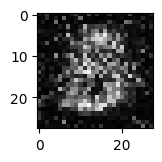


        loss status
        d_loss: 0.11783115565776825
        g_loss: 4.603738307952881
        
        
14 epoch termination

15 epoch execution


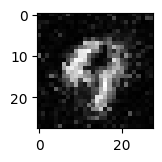


        loss status
        d_loss: 0.21143895387649536
        g_loss: 3.2427313327789307
        
        
15 epoch termination

16 epoch execution


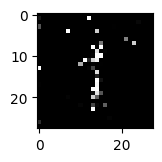


        loss status
        d_loss: 0.16207551956176758
        g_loss: 4.983800411224365
        
        
16 epoch termination

17 epoch execution


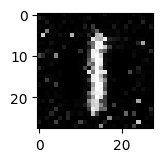


        loss status
        d_loss: 0.2345053255558014
        g_loss: 3.6274595260620117
        
        
17 epoch termination

18 epoch execution


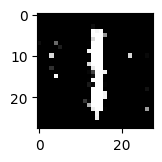


        loss status
        d_loss: 0.2504010796546936
        g_loss: 5.172652244567871
        
        
18 epoch termination

19 epoch execution


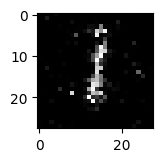


        loss status
        d_loss: 0.1777760088443756
        g_loss: 4.765003681182861
        
        
19 epoch termination

20 epoch execution


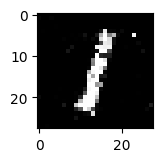


        loss status
        d_loss: 0.18145966529846191
        g_loss: 4.838496685028076
        
        
20 epoch termination

21 epoch execution


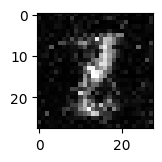


        loss status
        d_loss: 0.20275664329528809
        g_loss: 4.413852214813232
        
        
21 epoch termination

22 epoch execution


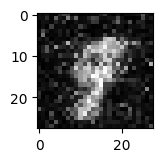


        loss status
        d_loss: 0.3108624219894409
        g_loss: 3.245675563812256
        
        
22 epoch termination

23 epoch execution


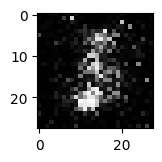


        loss status
        d_loss: 0.24309831857681274
        g_loss: 3.327695608139038
        
        
23 epoch termination

24 epoch execution


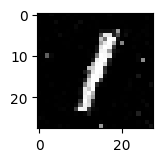


        loss status
        d_loss: 0.3186202943325043
        g_loss: 3.9968373775482178
        
        
24 epoch termination

25 epoch execution


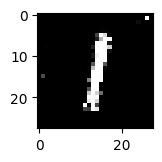


        loss status
        d_loss: 0.07262744754552841
        g_loss: 6.226606369018555
        
        
25 epoch termination

26 epoch execution


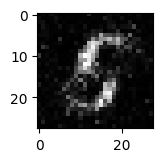


        loss status
        d_loss: 0.4024973213672638
        g_loss: 3.223621129989624
        
        
26 epoch termination

27 epoch execution


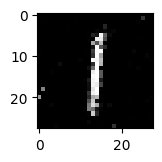


        loss status
        d_loss: 0.24701616168022156
        g_loss: 3.3785006999969482
        
        
27 epoch termination

28 epoch execution


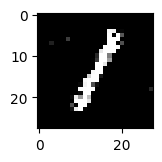


        loss status
        d_loss: 0.23306699097156525
        g_loss: 3.091747999191284
        
        
28 epoch termination

29 epoch execution


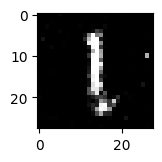


        loss status
        d_loss: 0.33345991373062134
        g_loss: 2.8256523609161377
        
        
29 epoch termination

30 epoch execution


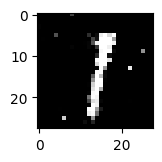


        loss status
        d_loss: 0.32919418811798096
        g_loss: 3.416944742202759
        
        
30 epoch termination

31 epoch execution


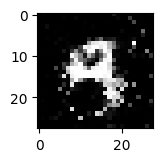


        loss status
        d_loss: 0.34828752279281616
        g_loss: 2.2133686542510986
        
        
31 epoch termination

32 epoch execution


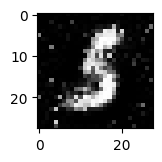


        loss status
        d_loss: 0.4708351492881775
        g_loss: 3.1691527366638184
        
        
32 epoch termination

33 epoch execution


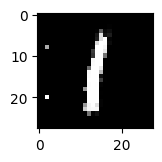


        loss status
        d_loss: 0.4370577335357666
        g_loss: 3.2566771507263184
        
        
33 epoch termination

34 epoch execution


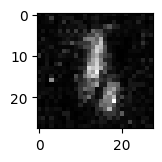


        loss status
        d_loss: 0.5061175227165222
        g_loss: 2.9632537364959717
        
        
34 epoch termination

35 epoch execution


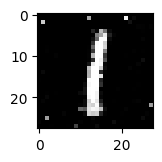


        loss status
        d_loss: 0.39128100872039795
        g_loss: 2.9263558387756348
        
        
35 epoch termination

36 epoch execution


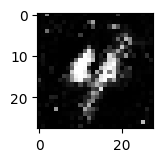


        loss status
        d_loss: 0.5617830753326416
        g_loss: 1.992849588394165
        
        
36 epoch termination

37 epoch execution


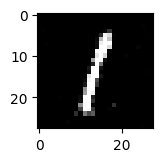


        loss status
        d_loss: 0.4694995880126953
        g_loss: 2.7190563678741455
        
        
37 epoch termination

38 epoch execution


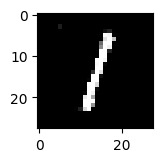


        loss status
        d_loss: 0.42397046089172363
        g_loss: 2.669373035430908
        
        
38 epoch termination

39 epoch execution


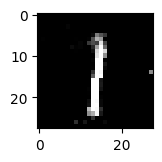


        loss status
        d_loss: 0.506294310092926
        g_loss: 1.7235711812973022
        
        
39 epoch termination

40 epoch execution


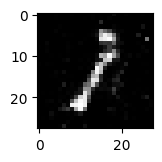


        loss status
        d_loss: 0.5751690864562988
        g_loss: 2.104933500289917
        
        
40 epoch termination

41 epoch execution


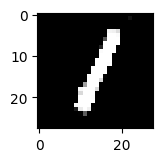


        loss status
        d_loss: 0.44941723346710205
        g_loss: 2.0544917583465576
        
        
41 epoch termination

42 epoch execution


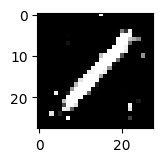


        loss status
        d_loss: 0.5192700624465942
        g_loss: 2.597890853881836
        
        
42 epoch termination

43 epoch execution


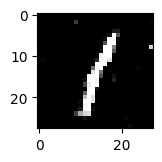


        loss status
        d_loss: 0.6731050610542297
        g_loss: 2.5316758155822754
        
        
43 epoch termination

44 epoch execution


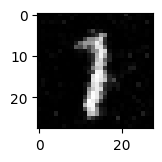


        loss status
        d_loss: 0.5919712781906128
        g_loss: 1.8668192625045776
        
        
44 epoch termination

45 epoch execution


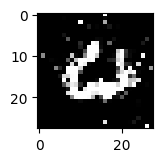


        loss status
        d_loss: 0.46850478649139404
        g_loss: 2.011522054672241
        
        
45 epoch termination

46 epoch execution


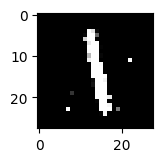


        loss status
        d_loss: 0.48682236671447754
        g_loss: 2.0791232585906982
        
        
46 epoch termination

47 epoch execution


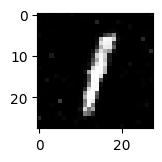


        loss status
        d_loss: 0.5907540917396545
        g_loss: 2.3737597465515137
        
        
47 epoch termination

48 epoch execution


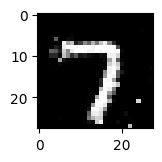


        loss status
        d_loss: 0.6283210515975952
        g_loss: 1.925036907196045
        
        
48 epoch termination

49 epoch execution


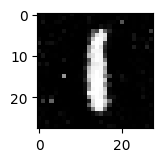


        loss status
        d_loss: 0.6289352774620056
        g_loss: 2.245934009552002
        
        
49 epoch termination

50 epoch execution


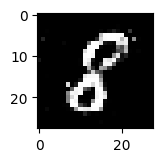


        loss status
        d_loss: 0.5843044519424438
        g_loss: 1.5892705917358398
        
        
50 epoch termination

51 epoch execution


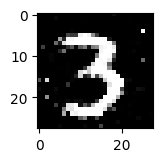


        loss status
        d_loss: 0.7910487651824951
        g_loss: 1.507977843284607
        
        
51 epoch termination

52 epoch execution


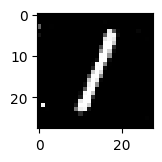


        loss status
        d_loss: 0.69037926197052
        g_loss: 1.4475414752960205
        
        
52 epoch termination

53 epoch execution


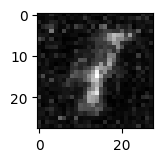


        loss status
        d_loss: 0.669416069984436
        g_loss: 1.5588414669036865
        
        
53 epoch termination

54 epoch execution


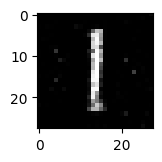


        loss status
        d_loss: 0.8316233158111572
        g_loss: 1.8052747249603271
        
        
54 epoch termination

55 epoch execution


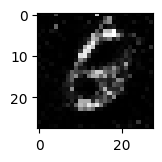


        loss status
        d_loss: 0.7384214997291565
        g_loss: 1.5589097738265991
        
        
55 epoch termination

56 epoch execution


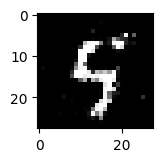


        loss status
        d_loss: 0.8130632638931274
        g_loss: 1.9606455564498901
        
        
56 epoch termination

57 epoch execution


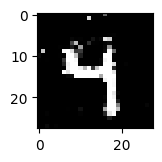


        loss status
        d_loss: 0.6619563102722168
        g_loss: 1.6145354509353638
        
        
57 epoch termination

58 epoch execution


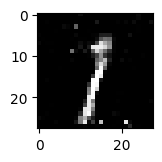


        loss status
        d_loss: 0.9075855612754822
        g_loss: 1.9522995948791504
        
        
58 epoch termination

59 epoch execution


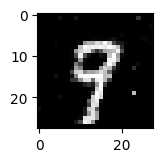


        loss status
        d_loss: 0.657238245010376
        g_loss: 1.76868736743927
        
        
59 epoch termination

60 epoch execution


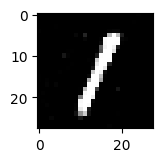


        loss status
        d_loss: 0.8735559582710266
        g_loss: 1.5468451976776123
        
        
60 epoch termination

61 epoch execution


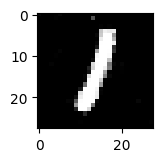


        loss status
        d_loss: 0.9347637295722961
        g_loss: 1.2545931339263916
        
        
61 epoch termination

62 epoch execution


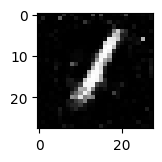


        loss status
        d_loss: 0.8820106983184814
        g_loss: 1.645560622215271
        
        
62 epoch termination

63 epoch execution


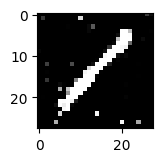


        loss status
        d_loss: 0.8194081783294678
        g_loss: 1.4947412014007568
        
        
63 epoch termination

64 epoch execution


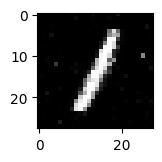


        loss status
        d_loss: 0.7801088690757751
        g_loss: 1.6739764213562012
        
        
64 epoch termination

65 epoch execution


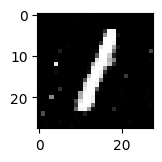


        loss status
        d_loss: 0.8541973829269409
        g_loss: 1.157012939453125
        
        
65 epoch termination

66 epoch execution


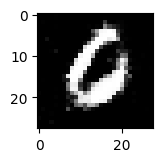


        loss status
        d_loss: 0.8465352654457092
        g_loss: 1.4478304386138916
        
        
66 epoch termination

67 epoch execution


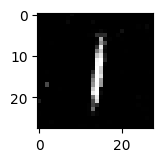


        loss status
        d_loss: 0.7507339715957642
        g_loss: 1.5220516920089722
        
        
67 epoch termination

68 epoch execution


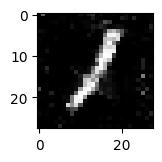


        loss status
        d_loss: 0.7862772345542908
        g_loss: 1.9851573705673218
        
        
68 epoch termination

69 epoch execution


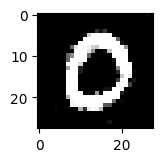


        loss status
        d_loss: 0.6781207323074341
        g_loss: 1.5481311082839966
        
        
69 epoch termination

70 epoch execution


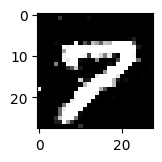


        loss status
        d_loss: 0.8336096405982971
        g_loss: 1.3962382078170776
        
        
70 epoch termination

71 epoch execution


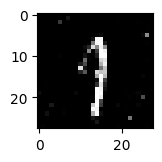


        loss status
        d_loss: 0.89096999168396
        g_loss: 1.4471020698547363
        
        
71 epoch termination

72 epoch execution


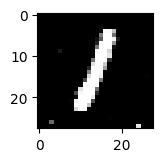


        loss status
        d_loss: 0.8528578281402588
        g_loss: 1.7290679216384888
        
        
72 epoch termination

73 epoch execution


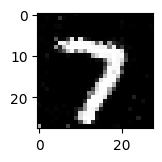


        loss status
        d_loss: 0.8136615753173828
        g_loss: 1.5975762605667114
        
        
73 epoch termination

74 epoch execution


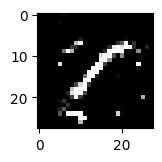


        loss status
        d_loss: 0.8553420305252075
        g_loss: 1.5505508184432983
        
        
74 epoch termination

75 epoch execution


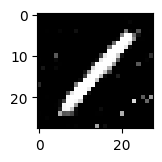


        loss status
        d_loss: 0.8726175427436829
        g_loss: 1.6416009664535522
        
        
75 epoch termination

76 epoch execution


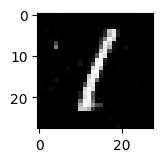


        loss status
        d_loss: 0.7394890785217285
        g_loss: 1.865857481956482
        
        
76 epoch termination

77 epoch execution


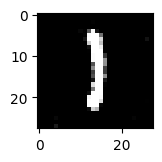


        loss status
        d_loss: 0.9350134134292603
        g_loss: 1.578373670578003
        
        
77 epoch termination

78 epoch execution


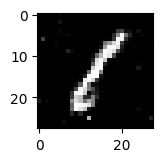


        loss status
        d_loss: 0.7422319650650024
        g_loss: 1.8899123668670654
        
        
78 epoch termination

79 epoch execution


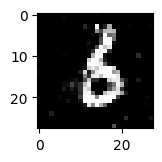


        loss status
        d_loss: 0.867774248123169
        g_loss: 1.4343209266662598
        
        
79 epoch termination

80 epoch execution


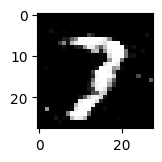


        loss status
        d_loss: 0.8537763357162476
        g_loss: 1.7196487188339233
        
        
80 epoch termination

81 epoch execution


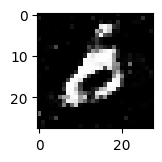


        loss status
        d_loss: 0.7644137740135193
        g_loss: 1.7284530401229858
        
        
81 epoch termination

82 epoch execution


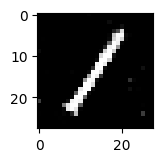


        loss status
        d_loss: 0.9364520311355591
        g_loss: 1.5143646001815796
        
        
82 epoch termination

83 epoch execution


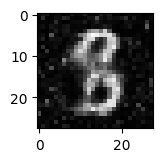


        loss status
        d_loss: 0.8063690066337585
        g_loss: 1.4811406135559082
        
        
83 epoch termination

84 epoch execution


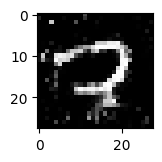


        loss status
        d_loss: 0.8627281188964844
        g_loss: 1.4653784036636353
        
        
84 epoch termination

85 epoch execution


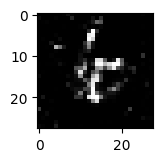


        loss status
        d_loss: 0.9578707218170166
        g_loss: 1.5467897653579712
        
        
85 epoch termination

86 epoch execution


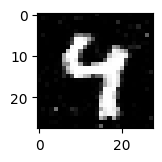


        loss status
        d_loss: 0.9552173614501953
        g_loss: 1.7420719861984253
        
        
86 epoch termination

87 epoch execution


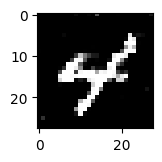


        loss status
        d_loss: 0.8636108636856079
        g_loss: 1.4214413166046143
        
        
87 epoch termination

88 epoch execution


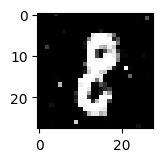


        loss status
        d_loss: 0.8620220422744751
        g_loss: 1.5314019918441772
        
        
88 epoch termination

89 epoch execution


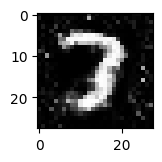


        loss status
        d_loss: 0.9021827578544617
        g_loss: 1.6499236822128296
        
        
89 epoch termination

90 epoch execution


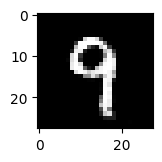


        loss status
        d_loss: 0.8839350938796997
        g_loss: 1.7055554389953613
        
        
90 epoch termination

91 epoch execution


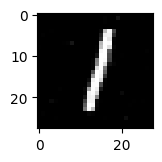


        loss status
        d_loss: 0.8043476343154907
        g_loss: 1.5392992496490479
        
        
91 epoch termination

92 epoch execution


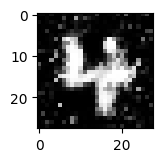


        loss status
        d_loss: 0.8845856189727783
        g_loss: 1.5187933444976807
        
        
92 epoch termination

93 epoch execution


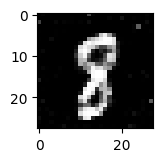


        loss status
        d_loss: 0.8603750467300415
        g_loss: 1.6129534244537354
        
        
93 epoch termination

94 epoch execution


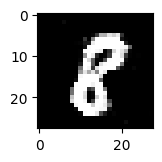


        loss status
        d_loss: 0.8678498268127441
        g_loss: 1.3761749267578125
        
        
94 epoch termination

95 epoch execution


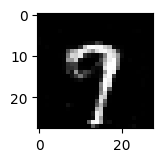


        loss status
        d_loss: 0.882250964641571
        g_loss: 1.2285021543502808
        
        
95 epoch termination

96 epoch execution


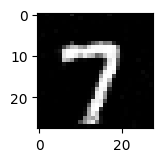


        loss status
        d_loss: 0.8605695962905884
        g_loss: 1.925925612449646
        
        
96 epoch termination

97 epoch execution


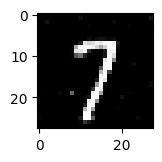


        loss status
        d_loss: 0.9082256555557251
        g_loss: 1.4920214414596558
        
        
97 epoch termination

98 epoch execution


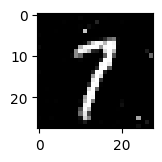


        loss status
        d_loss: 0.8635281324386597
        g_loss: 1.5238451957702637
        
        
98 epoch termination

99 epoch execution


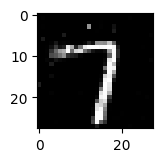


        loss status
        d_loss: 0.6887115240097046
        g_loss: 1.481434941291809
        
        
99 epoch termination

100 epoch execution


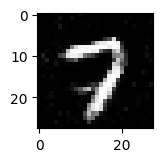


        loss status
        d_loss: 1.0390658378601074
        g_loss: 1.3517028093338013
        
        
100 epoch termination



In [19]:
torch.manual_seed(777)

for epoch in range(1, epochs + 1):
    print(f"{epoch} epoch execution")
    for x, y in data_loader:
        
        real_x = x.reshape(x.shape[0], -1).cuda()
        
        outputs = d(real_x)
        real_labels = torch.ones(batch_size, 1).cuda()
        d_loss_real = loss_function(outputs, real_labels)
                
        noise = torch.randn(batch_size, 784).cuda()
        fake_x = g(noise)
        
        outputs = d(fake_x)
        fake_labels = torch.zeros(batch_size, 1).cuda()
        d_loss_fake = loss_function(outputs, fake_labels)
        
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        noise = torch.randn(batch_size, 784).cuda()
        fake_x = g(noise)
        outputs = d(fake_x)
        
        g_loss = loss_function(outputs, real_labels)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
    with torch.no_grad():
        test_noise = torch.randn(1, 784).cuda()
        generated = g(test_noise)
        
        utils.imshow(generated)
        
    print(
        f"""
        loss status
        d_loss: {d_loss.item()}
        g_loss: {g_loss.item()}
        
        """
    )
    print(f"{epoch} epoch termination")
    print()
                

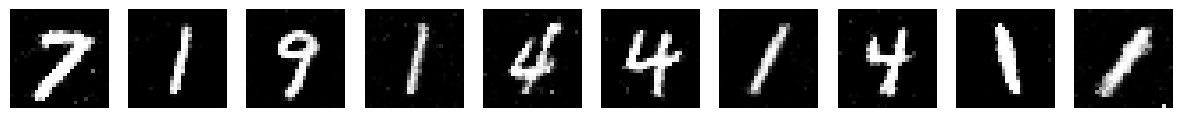

In [20]:
with torch.no_grad():
    rand_noise_grid = torch.randn(10, 784).cuda()
    rand_imgs = g(rand_noise_grid)

    utils.grid_imshow(rand_imgs)